In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [3]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

# Create a Train Test Split

Use `koi_disposition` for the y values

In [4]:
# Assign X (data) and y (target)

X = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag']]
y = df["koi_disposition"].values.reshape(-1, 1)
print(X.shape, y.shape) #shape --> rows,columns

(8744, 40) (8744, 1)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
8017,0,1,1,0,0.806277,4.947000e-06,-4.947000e-06,131.785670,0.006720,-0.006720,...,-184.0,4.471,0.054,-0.229,0.996,0.324,-0.108,290.81723,38.539120,13.614
1233,0,1,1,0,3.582077,4.318000e-06,-4.318000e-06,355.515064,0.000864,-0.000864,...,-235.0,4.422,0.090,-0.195,0.993,0.283,-0.131,296.07822,43.136940,15.193
2592,0,0,0,0,5.060923,2.616000e-05,-2.616000e-05,134.473160,0.004730,-0.004730,...,-112.0,4.492,0.048,-0.112,0.911,0.121,-0.060,289.91742,40.828606,13.346
4770,0,1,0,1,8.480304,3.320000e-07,-3.320000e-07,135.854534,0.000031,-0.000031,...,-169.0,3.946,0.195,-0.105,2.210,0.375,-0.563,298.80020,46.665539,7.631
6632,0,0,0,1,4.994716,4.495000e-05,-4.495000e-05,136.183300,0.009500,-0.009500,...,-194.0,3.706,0.320,-0.080,2.830,0.458,-1.068,282.58215,46.815510,13.352


# Pre-processing

Scale the data using the MinMaxScaler

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler model and fit it to the training data
scaler = MinMaxScaler()

X_scaler = MinMaxScaler().fit(X_train)


C:\Users\Owner\Anaconda3-2018.12\envs\PythonData\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Train different Classifiers and Support Vector Machine

In [14]:
#Transform the training and test data using scaled training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
#Create a classifier model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
#Fit (train) or model using the training data
classifier.fit(X_train_scaled, y_train.ravel())

C:\Users\Owner\Anaconda3-2018.12\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Owner\Anaconda3-2018.12\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.846447087526685
Testing Data Score: 0.833028362305581


In [19]:
#Predit using the test data
predictions = classifier.predict(X_test_scaled)
predictions

array(['FALSE POSITIVE', 'CANDIDATE', 'CONFIRMED', ..., 'CONFIRMED',
       'FALSE POSITIVE', 'CONFIRMED'], dtype=object)

In [21]:
#Compare the original y_test with the new predictions
compare_df = pd.DataFrame(predictions,  y_test) 
compare_df.head()

,0
"(FALSE POSITIVE,)",FALSE POSITIVE
"(CANDIDATE,)",CANDIDATE
"(CONFIRMED,)",CONFIRMED
"(CONFIRMED,)",CANDIDATE
"(CANDIDATE,)",FALSE POSITIVE


In [22]:
# Calculate classification report
#F1 score --> Measure of a test's accuracy, a weighted average of the precision and recall, best value at 1 and worst at 0.
#F1 scores corresponding to every class will tell you the accuracy of the classifier in classifying the data points in that
#particular class compared to all other classes. The classes are FALSE POSITIVE, CANDIDATE, CONFIRMED
#As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

#The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
#The recall is intuitively the ability of the classifier to find all the positive samples.
#The support is the number of samples of the true response that lie in that class.

from sklearn.metrics import classification_report
target_names = ["FALSE POSITIVE", "CANDIDATE", "CONFIRMED"]
print(classification_report(y_test, predictions, target_names=target_names)) 

                precision    recall  f1-score   support

FALSE POSITIVE       0.70      0.58      0.63       523
     CANDIDATE       0.68      0.76      0.72       594
     CONFIRMED       0.98      1.00      0.99      1069

     micro avg       0.83      0.83      0.83      2186
     macro avg       0.79      0.78      0.78      2186
  weighted avg       0.83      0.83      0.83      2186



k: 1, Train/Test Score: 1.000/0.783
k: 3, Train/Test Score: 0.895/0.799
k: 5, Train/Test Score: 0.869/0.812
k: 7, Train/Test Score: 0.862/0.812
k: 9, Train/Test Score: 0.857/0.810
k: 11, Train/Test Score: 0.851/0.805
k: 13, Train/Test Score: 0.848/0.802
k: 15, Train/Test Score: 0.847/0.809
k: 17, Train/Test Score: 0.843/0.806
k: 19, Train/Test Score: 0.840/0.808


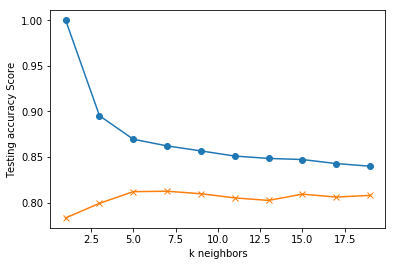

In [23]:
# Loop through different k values and look for the highest accuracy
# Use odd numbers to avoid any ties

from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train.ravel())
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [24]:
# k: 5 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train.ravel())
print('k=5 Test Accuracy: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Accuracy: 0.812


In [25]:
predicted_class = knn.predict(X_test)
print(predicted_class)

['FALSE POSITIVE' 'FALSE POSITIVE' 'FALSE POSITIVE' ... 'FALSE POSITIVE'
 'FALSE POSITIVE' 'FALSE POSITIVE']


In [26]:
# Calculate classification report on KNeighborsClassifier

target_names = ["FALSE POSITIVE", "CANDIDATE", "CONFIRMED"]
print(classification_report(y_test, predicted_class, target_names=target_names)) 

                precision    recall  f1-score   support

FALSE POSITIVE       0.00      0.00      0.00       523
     CANDIDATE       0.00      0.00      0.00       594
     CONFIRMED       0.49      1.00      0.66      1069

     micro avg       0.49      0.49      0.49      2186
     macro avg       0.16      0.33      0.22      2186
  weighted avg       0.24      0.49      0.32      2186



C:\Users\Owner\Anaconda3-2018.12\envs\PythonData\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
# Train the model on training set using Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train_scaled, y_train.ravel()) 


GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
# Make prediction on the test set 
gnb_pred = gnb.predict(X_test) 

In [50]:
# Calculate classification report on Gaussian Naive Bayes classifier
from sklearn.metrics import classification_report
print(classification_report(y_test, gnb_pred,
                            target_names=target_names))

                precision    recall  f1-score   support

FALSE POSITIVE       0.00      0.00      0.00       523
     CANDIDATE       0.00      0.00      0.00       594
     CONFIRMED       0.49      1.00      0.66      1069

     micro avg       0.49      0.49      0.49      2186
     macro avg       0.16      0.33      0.22      2186
  weighted avg       0.24      0.49      0.32      2186



In [33]:
# Compare actual response values (y_test) with Gaussian Naive Bayes classifier predicted response values (gnb_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, gnb_pred)*100)


Gaussian Naive Bayes model accuracy(in %): 48.902104300091494


In [34]:
# Compare actual response values (y_test) with Logistic Regression classifier predicted response values (predictions) 
from sklearn import metrics 
print("Logistic Regression model accuracy(in %):", metrics.accuracy_score(y_test, predictions)*100)


Logistic Regression model accuracy(in %): 83.3028362305581


In [39]:
# Compare actual response values (y_test) with KNeighborsClassifier predicted response values (predicted_class) 
from sklearn import metrics 
print("KNeighborsClassifier model accuracy(in %):", metrics.accuracy_score(y_test, predicted_class)*100)

KNeighborsClassifier model accuracy(in %): 48.902104300091494


In [44]:
#Train the SVC model using the training sets and check score
svcmodel.fit(X_train_scaled, y_train.ravel())
svcmodel.score(X_train_scaled, y_train.ravel())

0.8502592253735896

In [46]:
#Predict Output
predicted_svc = svcmodel.predict(X_test)
predicted_svc

array(['FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', ...,
       'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE'], dtype=object)

In [47]:
# Let us also compare actual response values (y_test) with SVC predicted response values (predicted_svc) 
from sklearn import metrics 
print("SVC Classifier model accuracy(in %):", metrics.accuracy_score(y_test, predicted_svc)*100)

SVC Classifier model accuracy(in %): 45.56267154620311


In [48]:
# Next, calculate classification report on svc classifier
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_svc,
                            target_names=target_names))

                precision    recall  f1-score   support

FALSE POSITIVE       0.17      0.04      0.06       523
     CANDIDATE       0.07      0.01      0.01       594
     CONFIRMED       0.48      0.91      0.63      1069

     micro avg       0.46      0.46      0.46      2186
     macro avg       0.24      0.32      0.23      2186
  weighted avg       0.29      0.46      0.32      2186

